Scalability is a critical concern for cellular computing substratum.
One of the main motivation for the study of emergent computation available with cellular computing is the ability to have a substratum with shared memory and processing units while having a very manageable conectivity.
Its scalability in term of computing units on digital substratum should thus be linear (surface of implementation on digital substrate should be propotional to the number of processing units).

Speed will decrease with the surface howver in case of synchronous implementation (more units means smaller clock frequency).

However, in this tutoriel we have a fixed substratum area and we want to study the simulation scalability in term of speed. Concretly, if I want to simulate a crazy big game of life able of containing a very big turing machine, how fast the update will be? How big can be the grid while having a decent speed?

This scalability issues will be studied in this section. The benchmark will then be used to compare the different implementation.

For now we are studying the *discrete*, *synchronous* cellular automatons.

In [1]:
import time
from gameOfLifeBool import GameOfLifeBool

In [2]:

def simulationTime(uut,nbIt):
    tStart = time.time()
    uut.run(nbIteration=nbIt)
    tEnd = time.time()
    return tEnd - tStart



In [3]:
size_list = [10,100,1000,5000,7500,10000]
nbIt_list = [1,10,50,100]
modelClass = GameOfLifeBool

In [4]:

data = []
for size in size_list:
    print('size',size)
    uut = modelClass((size,size))        
    for nbIt in nbIt_list:
        print('    nbIt',nbIt)
        for repet in range(10):
            simuTime = simulationTime(uut,nbIt)
            data.append([size,nbIt,repet,simuTime])
            
        
    

size 10
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100
size 100
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100
size 1000
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100
size 5000
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100
size 7500
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100
size 10000
    nbIt 1
    nbIt 10
    nbIt 50
    nbIt 100


In [50]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.DataFrame(data,columns=['Size','Iteration number','Repetition','Simulation time'])
df['Unit number'] = df['Size']**2
df.tail()

,Size,Iteration number,Repetition,Simulation time,Unit number
235,10000,100,5,73.155714,100000000
236,10000,100,6,72.796269,100000000
237,10000,100,7,72.610317,100000000
238,10000,100,8,72.655171,100000000
239,10000,100,9,73.180039,100000000


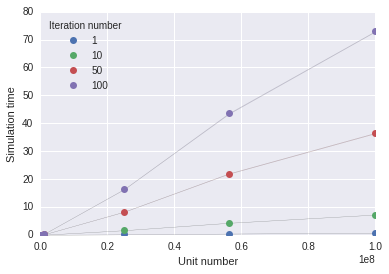

In [55]:
sns.tsplot(data=df,time='Unit number',unit='Repetition',value='Simulation time',condition='Iteration number',interpolate=False)


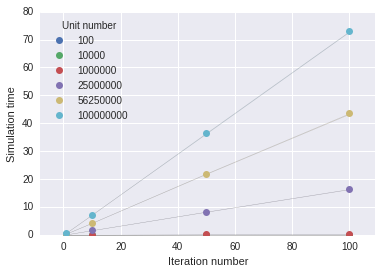

In [54]:
sns.tsplot(data=df,condition='Unit number',unit='Repetition',value='Simulation time',time='Iteration number',interpolate=False)

We can see that the computation is linear with time and number of units.